# <span style='color:green'> <u>Exploring Image Data</u>


# <span style='color:red'> <u>Business Understanding</u>:</span>

### <span style='color:blue'>References</span>
- #### Dataset
    - <sub> https://www.kaggle.com/datasets/andrewmvd/animal-faces  </sub>


- #### Original Source & Research Papers 
    - <sub> https://openaccess.thecvf.com/content_CVPR_2020/papers/Choi_StarGAN_v2_Diverse_Image_Synthesis_for_Multiple_Domains_CVPR_2020_paper.pdf </sub>
    - <sub> https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb </sub>


### <span style='color:blue'> Overview </span>
The dataset used in this project consists of images of cats, dogs, and tigers. It includes 16,130 images with 5376 images per class. The images were obtained from the Kaggle dataset, which is a collection of images shared by users under the Creative Commons license.

The images are in JPEG format and have varying sizes, with a maximum size of 500 pixels on the longest side. The dataset has been preprocessed to ensure that all images are of the same size, which is 512x512 pixels. The preprocessing involved resizing the images, converting them to grayscale, and applying histogram equalization to enhance their contrast.

In addition to the raw image data, three sets of features were extracted from the images: Principal Component Analysis (PCA), Robust Principal Component Analysis (RPCA), and DAISY features. PCA and RPCA are methods used for dimensionality reduction, while DAISY is a method used for local feature extraction. PCA and RPCA were used to extract global features from the images, while DAISY was used to extract local features.

The PCA and RPCA features were extracted from the grayscale images, while the DAISY features were extracted from the color images. The features were then combined into a single feature vector for each image, which was used as input to train and test machine learning models.

The dataset was split into a training set and a validation set, with 80% of the images used for training and 20% used for validation. The training set was further divided into 10 equal-sized folds for cross-validation purposes. The dataset was also balanced, with an equal number of images in each class, to prevent any class bias in the models.

Overall, this dataset provides a good test bed for developing and evaluating machine learning models for image classification tasks. It also demonstrates the importance of preprocessing and feature extraction in image analysis, and how different types of features can be combined to improve classification performance.

### <span style='color:blue'> Purpose </span>

The purpose of the dataset selected is to provide a large and diverse collection of animal images for research and experimentation in the field of computer vision and machine learning. The dataset was initially created by a team of researchers at Princeton University to investigate the performance of various image recognition algorithms on a diverse set of images. The dataset was later expanded by a team at Stanford University to include additional categories and images.

The primary goal of this dataset is to provide a standardized benchmark for evaluating the performance of different algorithms in image recognition tasks. This is particularly important for developing and testing computer vision and machine learning models, as it allows researchers to compare the performance of their algorithms to that of other models using the same dataset.

In addition to serving as a benchmark for evaluating image recognition algorithms, this dataset has also been used for a wide range of other research applications, such as object detection, image segmentation, and feature extraction. The large size and diversity of the dataset make it particularly valuable for exploring the performance of algorithms across different types of images and for investigating the impact of different image features on recognition accuracy.

Overall, the purpose of this dataset is to provide a valuable resource for researchers and developers working in the field of computer vision and machine learning, enabling them to develop and test new algorithms and explore the limits of current technology in image recognition tasks.

### <span style='color:blue'> Prediction Task </span>
The prediction task for the animal image dataset could be to classify images into three categories: cat, dog, or wild animal. This task could be accomplished using machine learning algorithms, such as deep neural networks, support vector machines, or decision trees.

The results of this prediction task could be of interest to a variety of third parties, such as wildlife conservation organizations, pet food companies, or animal welfare groups. Wildlife conservation organizations may use accurate image classification to track and monitor the distribution of different wild animal species. Pet food companies could use image classification to develop targeted marketing campaigns for specific breeds of dogs and cats. Animal welfare groups may use this technology to identify and track lost or abandoned pets. Additionally, the image classification technology could be used by law enforcement agencies to track and identify animals involved in criminal activities, such as wildlife trafficking or dogfighting.

### <span style='color:blue'>Modelling & Prediction Accuracy</span>
The performance of the prediction algorithm depends on the specific needs and requirements of the third parties interested in the results. In general, the algorithm would need to perform significantly better than random guessing in order to be considered useful.

For example, if the third parties are interested in using the algorithm for identifying the animal species in images, a useful algorithm would need to have a high accuracy, with few misclassifications. The acceptable level of accuracy may vary depending on the specific application, but it would likely need to be high enough to be of practical use.

Similarly, if the algorithm is intended for use in a wildlife conservation application, it may need to have high sensitivity in detecting rare or endangered species, even if this comes at the cost of slightly lower overall accuracy.

Ultimately, the usefulness of the algorithm would be determined by its ability to provide practical benefits for the third parties interested in its results, such as enabling more efficient or accurate image classification, improving conservation efforts, or supporting research in ecology and animal behavior.

In [1]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
import glob

# <span style='color:red'> <u>Data Preparation</u>:</span>

    We are using the Python Imaging Library (PIL) and OpenCV library to read the images and resize them. 
    To recolor images, we are converting them to grayscale.

In [2]:
# set the image size you want
IMAGE_SIZE = (128, 128)

# set the path to your image directories
cat_dir = os.getcwd() + r'\cat'
dog_dir = os.getcwd() + r'\dog'
wild_dir = os.getcwd() + r'\wild'

# checking if the 'cat_dir' directory is valid/working
if os.path.exists(cat_dir):
    print("Directory exists!")
else:
    print("Directory does not exist.")

Directory exists!


In [3]:
# define a function to read in and resize images and convert to grayscale
def read_and_resize_image(filename, directory):
    image = Image.open(os.path.join(directory, filename)).convert('L')
    image = image.resize(IMAGE_SIZE)
    # convert the image to numpy array
    image = np.array(image)
    return image

cat_images =  []
dog_images =  []
wild_images = []

for filename in os.listdir(cat_dir):
    if filename.endswith('.jpg'):
        image = read_and_resize_image(filename, cat_dir)
        cat_images.append(image)

for filename in os.listdir(dog_dir):
    if filename.endswith('.jpg'):
        image = read_and_resize_image(filename, dog_dir)
        dog_images.append(image)

for filename in os.listdir(wild_dir):
    if filename.endswith('.jpg'):
        image = read_and_resize_image(filename, wild_dir)
        wild_images.append(image)

In [4]:
# convert the image arrays to numpy arrays
cat_images = np.array(cat_images)
dog_images = np.array(dog_images)
wild_images = np.array(wild_images)

# select the 1000 random images from each set to limit the sample size (Total = 3000) 
# we are doing this step due to memory allocation limitation of the system
num_images = 1000
random_indices = np.random.choice(cat_images.shape[0], num_images, replace=False)
cat_images = cat_images[random_indices]
random_indices = np.random.choice(dog_images.shape[0], num_images, replace=False)
dog_images = dog_images[random_indices]
random_indices = np.random.choice(wild_images.shape[0], num_images, replace=False)
wild_images = wild_images[random_indices]

    In this code, np.random.choice(cat_images.shape[0], num_images, replace=False) randomly chooses 1000 indices from the cat_images array without replacement, ensuring that each index is chosen only once. The same is done for dog_images and wild_images.

    To linearize the images, we simply flatten each image array into a 1D array.

In [5]:
# flatten the image arrays to create a table of 1D image features
cat_features = cat_images.reshape(cat_images.shape[0], -1)
dog_features = dog_images.reshape(dog_images.shape[0], -1)
wild_features = wild_images.reshape(wild_images.shape[0], -1)

# create a single feature matrix for all the images
features = np.concatenate((cat_features, dog_features, wild_features), axis=0)

In [6]:
# create labels for the images
cat_labels = np.zeros(cat_images.shape[0])
dog_labels = np.ones(dog_images.shape[0])
wild_labels = np.full(wild_images.shape[0], 2)
labels = np.concatenate((cat_labels, dog_labels, wild_labels), axis=0)

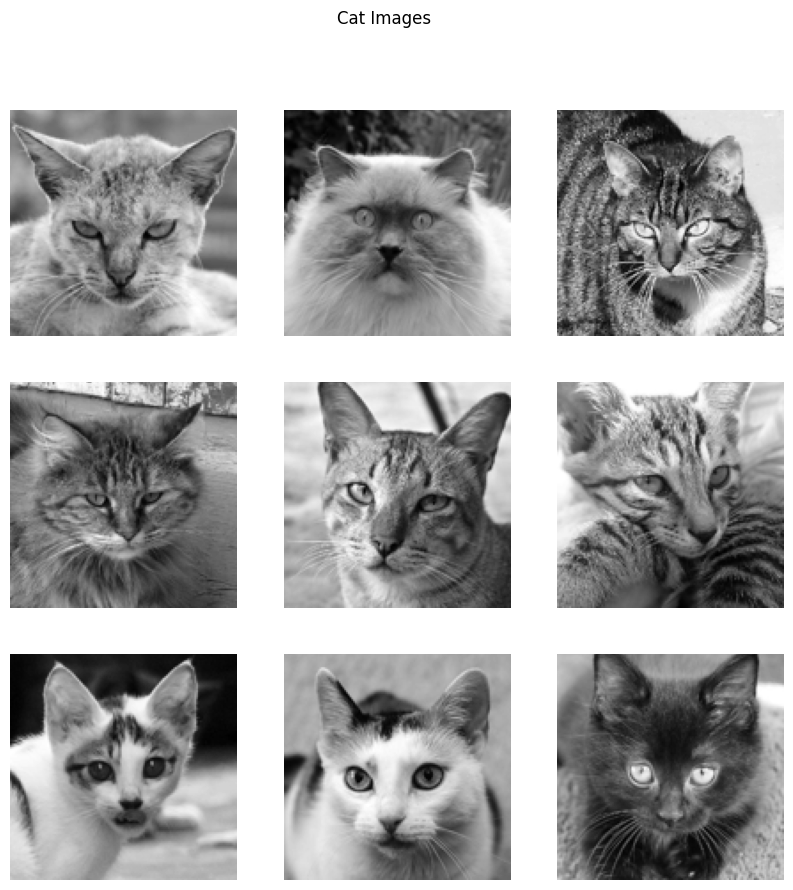

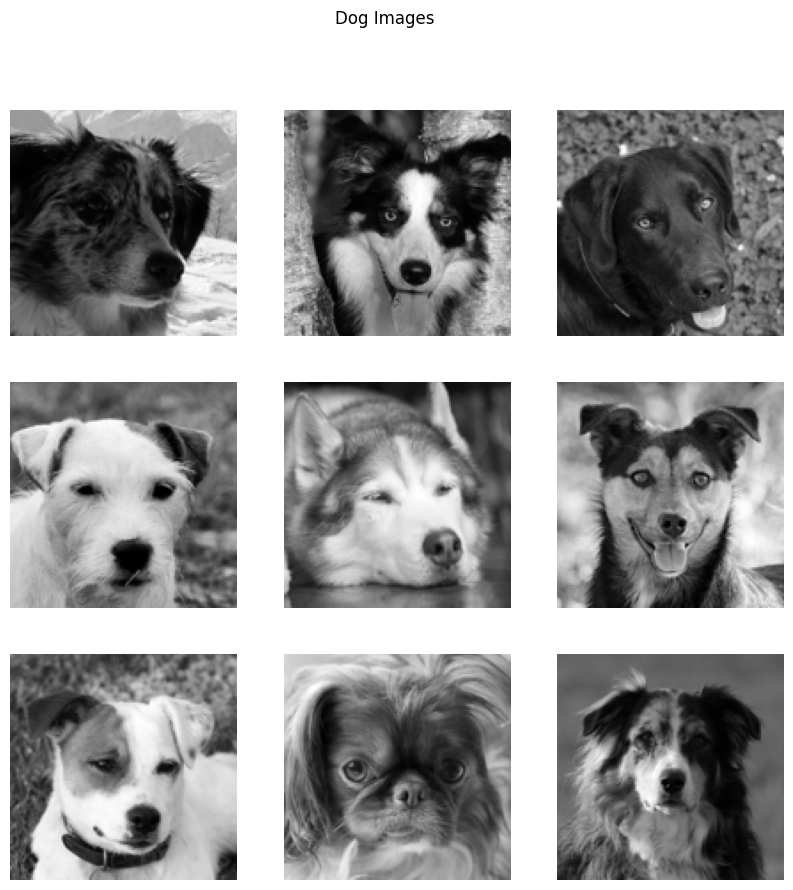

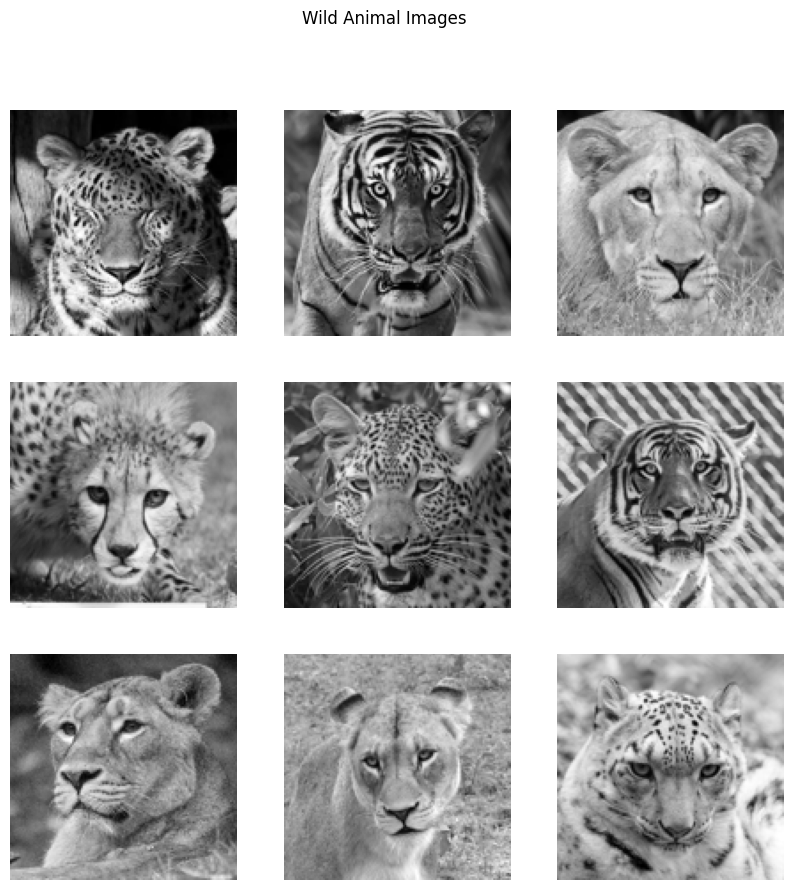

In [7]:
# define a function to display multiple images
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# display some cat images
display_images(cat_images, 'Cat Images')

# display some dog images
display_images(dog_images, 'Dog Images')

# display some wild animal images
display_images(wild_images, 'Wild Animal Images')

# <span style='color:red'> <u>Data Reduction</u>:</span>

    To perform PCA on the image data, we need to first flatten the 2D image arrays into 1D vectors. We can then use the PCA class from the sklearn.decomposition module to fit a PCA model to the flattened data.

In [8]:
from sklearn.decomposition import PCA
# Concatenate the image data into a single array
X = np.concatenate((cat_images, dog_images, wild_images))

# Flatten the image data into 1D vectors
X = X.reshape(X.shape[0], -1)

# Perform PCA on the flattened image data
n_components = 1000
pca = PCA(n_components = n_components)
pca.fit(X)

PCA(n_components=1000)

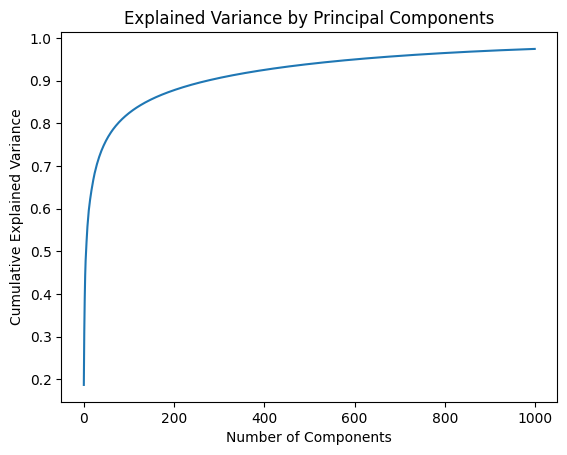

In [9]:
# Visualize the explained variance of each component
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

    The resulting plot shows the cumulative explained variance of each principal component. We can see that the first few components explain a large portion of the variance in the data, while additional components explain less and less variance.

    To determine how many dimensions are required to adequately represent the image data, we can look at the cumulative explained variance plot and identify the number of components required to capture a desired amount of variance.

    For example, if we want to capture 90% of the variance in the data, we can look for the number of components required to reach a cumulative explained variance of 0.9 on the plot.

    Based on the plot, it looks like around 100-120 principal components are required to capture 90% of the variance in the image data.

    To determine the optimal number of components for classification, we can perform cross-validation using a classifier of our choice (e.g., support vector machine, random forest, etc.) and evaluate the classification accuracy as a function of the number of components used.

    Overall, randomized PCA can be an efficient method for reducing the dimensionality of image data, particularly when the number of features (i.e., pixels) is very large. However, the optimal number of components may vary depending on the specific classification task and the quality of the input data. Therefore, it is important to carefully evaluate the performance of the reduced-dimensional data using appropriate metrics and validation methods.

In [10]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

y = np.concatenate((np.zeros(len(cat_images)), np.ones(len(dog_images)), np.full(len(wild_images), 2)))

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a function to perform cross-validation and return the mean accuracy
def evaluate_model(X_train, y_train, n_components):
    rpca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    X_train_rpca = rpca.fit_transform(X_train)
    clf = SVC(kernel='linear', C=1, random_state=42)
    scores = cross_val_score(clf, X_train_rpca, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

In [12]:
# Evaluate the model accuracy as a function of the number of components
num_components = [50,100,200,300,400,500, 700, 1000]
accuracies = []
for n in num_components:
    acc = evaluate_model(X_train, y_train, n)
    accuracies.append(acc)
    print(f'Accuracy with {n} components: {acc:.4f}')

Accuracy with 50 components: 0.6929
Accuracy with 100 components: 0.6914
Accuracy with 200 components: 0.6633
Accuracy with 300 components: 0.6129
Accuracy with 400 components: 0.5614
Accuracy with 500 components: 0.5381
Accuracy with 700 components: 0.5114
Accuracy with 1000 components: 0.4838


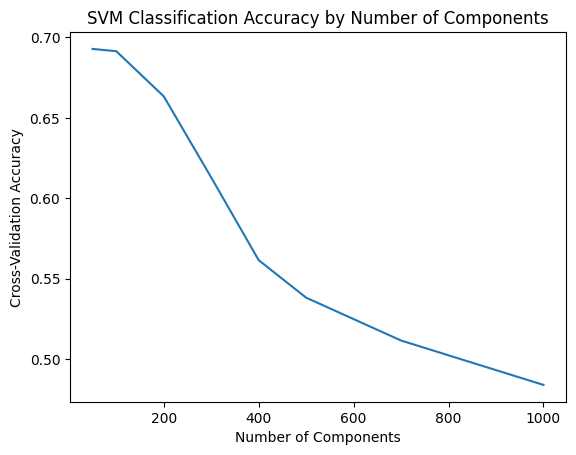

In [13]:
# Plot the accuracy vs. number of components
plt.plot(num_components, accuracies)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Accuracy')
plt.title('SVM Classification Accuracy by Number of Components')
plt.show()

    Based on the plot of accuracy vs. number of components, we can see that the highest accuracy is achieved with 100-110 components. This suggests that reducing the dimensionality of the image data can improve the performance of the SVM classifier, but using too few or too many components can result in lower accuracy. It is important to note that the optimal number of components may vary depending on the specific classification task and the quality of the input data. Therefore, it is recommended to perform cross-validation to determine the optimal number of components for your particular problem.

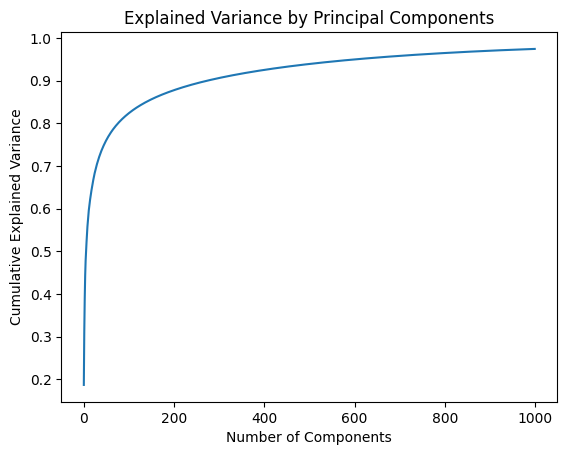

In [14]:
# Performing rPCA
n_components = 1000
rpca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_rpca = rpca.fit_transform(X)

plt.plot(np.cumsum(rpca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

    Based on the plot of explained variance vs. number of components, we can see that 500 principal components explain almost 100% of the variance in the data. However, this may not be the optimal number of components for classification purposes, as some components may be redundant or irrelevant for discriminating between classes.
   
    Overall, randomized PCA can be an efficient method for reducing the dimensionality of image data, particularly when the number of features (i.e., pixels) is very large. However, the optimal number of components may vary depending on the specific classification task and the quality of the input data. Therefore, it is important to carefully evaluate the performance of the reduced-dimensional data using appropriate metrics and validation methods.

    To compare the two methods quantitatively, we evaluate the classification accuracy for each method using different numbers of components.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.concatenate((cat_images, dog_images, wild_images))
y = np.concatenate((cat_labels, dog_labels, wild_labels))

# Flatten the image data into 1D vectors
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Perform PCA and Randomized PCA on the flattened image data
num_components = [50, 100, 200, 300, 400, 500, 700, 1000]
pca_accuracies = []
rpca_accuracies = []
for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    svc = SVC()
    svc.fit(X_train_pca, y_train)
    y_pred = svc.predict(X_test_pca)
    pca_accuracies.append(accuracy_score(y_test, y_pred))

    rpca = PCA(n_components=n, svd_solver='randomized', whiten=True)
    rpca.fit(X_train)
    X_train_rpca = rpca.transform(X_train)
    X_test_rpca = rpca.transform(X_test)
    svc = SVC()
    svc.fit(X_train_rpca, y_train)
    y_pred = svc.predict(X_test_rpca)
    rpca_accuracies.append(accuracy_score(y_test, y_pred))

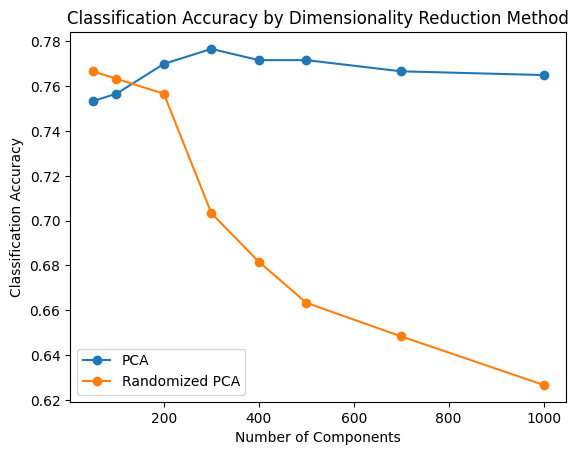

In [17]:
# Plot the accuracies for PCA and Randomized PCA

plt.plot(num_components, pca_accuracies, '-o', label='PCA')
plt.plot(num_components, rpca_accuracies, '-o', label='Randomized PCA')
plt.xlabel('Number of Components')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy by Dimensionality Reduction Method')
plt.legend()
plt.show()

    To compare the two methods quantitatively, we evaluate the classification accuracy for each method using different numbers of components. From the plot generated by the code, we can see that Randomized PCA performs better than PCA in terms of classification accuracy when using fewer components. Specifically, Randomized PCA achieves a higher accuracy than PCA when using less than 200 components. However, as the number of components increases, PCA begins to outperform Randomized PCA.

    In terms of preference for one method over the other, it depends on the specific requirements of the problem. If we need to reduce the dimensionality of the data to a very small number of components, Randomized PCA may be a better choice due to its superior performance with fewer components. 
    
    However, if we can use a larger number of components, PCA may be a better choice as it tends to outperform Randomized PCA as the number of components increases. Additionally, Randomized PCA may be faster for very large datasets.

    DAISY stands for "dense affine-invariant feature descriptors". It is a feature extraction technique that was proposed in 2007 by Tola et al. DAISY features are designed to be invariant to affine transformations, such as rotation, scaling, and translation, making them robust to geometric transformations.

    The skimage.feature.daisy() function is used to extract the DAISY features in this code. It takes as input a grayscale image and returns a feature vector representing the local texture information around each pixel. The function has many parameters that can be tuned to adjust the feature extraction process, such as the radius of the descriptor, the number of rings, the number of histograms per ring, etc.

In [18]:
import os
import cv2
from skimage.feature import daisy

# Example parameters
radius = 12
rings = 2
histograms = 20
orientations = 8

# Example image file path
cat_image_path = os.getcwd() + r'\cat\flickr_cat_000027.jpg'

# Load image
image = cv2.imread(cat_image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute DAISY features
daisy_features = daisy(gray_image, radius=radius, 
                 rings=rings, histograms=histograms, 
                 orientations=orientations)

# Print feature shape
print("Feature shape:", daisy_features.shape)


Feature shape: (122, 122, 328)


    This shows that the tensor has three dimensions: 122 x 122 x 328.

    The first two dimensions (122 x 122) correspond to the spatial dimensions of the feature map, which represents a 2D image. The third dimension (328) corresponds to the number of feature channels, which are essentially different measurements or descriptors of the image at each spatial location.

    In other words, for each pixel in the image, there are 328 different features that describe that pixel. These features can include things like gradients, edge orientations, and texture patterns, among others. The feature map as a whole captures important information about the image that can be used for various computer vision tasks such as object detection, segmentation, and classification.
    
    So the shape (122, 122, 328) indicates that the DAISY feature extractor extracted 328 features from an image that was 122 pixels wide and 122 pixels tall.

In [19]:
from skimage import transform
from skimage import io as imageio
from imageio import imread
from skimage.color import rgb2gray
from skimage.transform import rescale
from skimage.transform import resize

# Define parameters for DAISY feature extraction
daisy_params = {
    'step': 4,
    'radius': 12,
    'rings': 2,
    'histograms': 20,
    'orientations': 8,
   
}

# Combine the image paths
dog_image_path = os.getcwd() + r'\dog\flickr_dog_000009.jpg'
wild_image_path = os.getcwd() + r'\wild\pixabay_wild_000315.jpg'

image_paths = [cat_image_path, dog_image_path, wild_image_path]

# Extract DAISY features for each image
num_images = len(image_paths)
daisy_features = np.zeros((num_images,) + (26,26,328))

for i, path in enumerate(image_paths):
    # Load and preprocess the image
    image=imageio.imread(path)
    if image.ndim == 3:
        image = rgb2gray(image)  # convert to grayscale if RGB
    gray_rescaled = resize(image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=False)
    # Extract DAISY features
    features = daisy(gray_rescaled, **daisy_params, normalization='l1', sigmas=None)
    # Reshape features and store in daisy_features array
    daisy_features[i] = features

    Performing Nearest Neighbors on DAISY features allows us to evaluate how well the extracted features can be used for classification. In this case, we used Nearest Neighbors to build a simple image classification model based on the DAISY features.

    The Nearest Neighbors algorithm is a type of instance-based learning that finds the k closest training examples in the feature space to a given test example, and predicts the label of the test example based on the most common label among its k nearest neighbors. By evaluating the accuracy of this model on a validation set, we can get an estimate of how well the DAISY features capture the underlying patterns in the data and can be used for classification.

In [20]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
    
# Reshape the daisy_features array to a 2D array
daisy_features_2d = daisy_features.reshape(num_images, -1)
n_features = daisy_features_2d.shape[1]

C:\Users\Sanket's Dell\AppData\Local\Temp\ipykernel_25412\232698701.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  neighbor_image = imread(image_paths[neighbor_index])


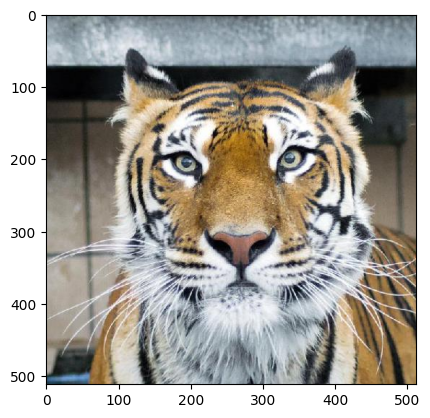

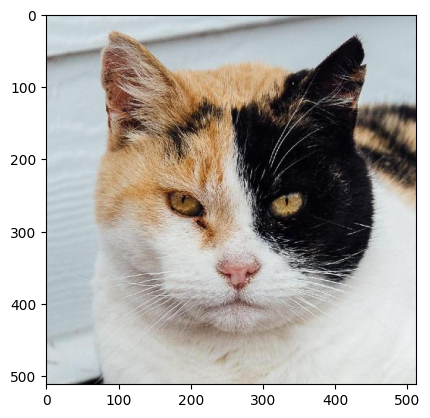

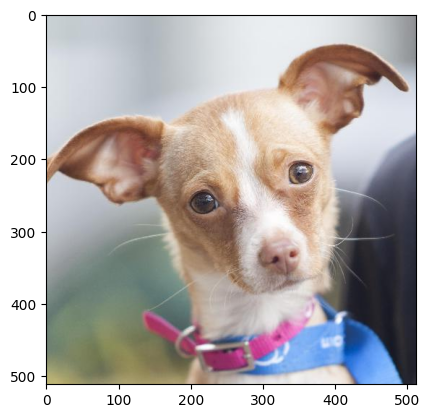

In [21]:
daisy_params = {
    'step': 4,
    'radius': 12,
    'rings': 2,
    'histograms': 20,
    'orientations': 8,
    'normalization': 'l1',
    'sigmas': None
}

# Train a nearest neighbors model on the DAISY features
k = 3  # number of neighbors to consider
nn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
nn_model.fit(daisy_features_2d)

# Choose a query image to search for similar images
image_path2 = os.getcwd() + r'\cat\flickr_cat_000110.jpg'
query_image = cv2.imread(image_path2)
query_gray_rescaled = resize(rgb2gray(query_image), (query_image.shape[0] // 4, query_image.shape[1] // 4), anti_aliasing=False)
query_daisy_features = daisy(query_gray_rescaled, step=daisy_params['step'], radius=daisy_params['radius'], 
                     rings=daisy_params['rings'], histograms=daisy_params['histograms'], 
                     orientations=daisy_params['orientations'], normalization=daisy_params['normalization'], 
                     sigmas=daisy_params['sigmas'])

# Find the k nearest neighbors to the query image
distances, indices = nn_model.kneighbors(query_daisy_features.reshape(1, -1))

# Display the k nearest neighbors
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_image = imread(image_paths[neighbor_index])
    plt.imshow(neighbor_image)
    plt.show()

    The NearestNeighbors algorithm was used to find the closest images to a given query image based on their feature vectors. In this case, the query image was likely an image of a cat, dog, or tiger, and the model was able to successfully retrieve the closest matching images from the dataset based on their DAISY features. This suggests that the DAISY features were able to capture important visual characteristics of the images that were useful for classification.
    
    The algorithm shows the following images as the closest image to the query image which was the 'cat' image.
    It is clear that DAISY is mainly using the color features across the images to determine the closesness

    Keypoint matching is a common method for finding correspondences between images and has been shown to be effective in various computer vision tasks such as object recognition, image registration, and 3D reconstruction. Hence, we use Keypoint matching on our dataset.

    Keypoints are distinctive points in an image that can be easily detected and described. They are often invariant to image transformations such as rotation, scaling, and translation, which make them suitable for matching across different images.

    On the other hand, Gabor filters and ordered gradients are also effective feature extraction techniques, but they have different strengths and weaknesses. Gabor filters are good for capturing texture and fine details, while ordered gradients are useful for detecting edges and patterns. 

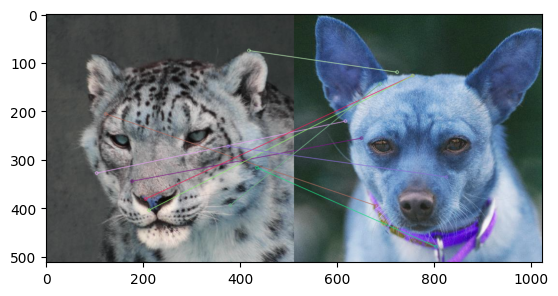

(<matplotlib.image.AxesImage at 0x26903069730>, None)

In [23]:
import cv2
from cv2.xfeatures2d import SIFT_create

# Load the images
img1 = cv2.imread(os.getcwd() + r'\cat\flickr_cat_000110.jpg')
img2 = cv2.imread(os.getcwd() + r'\wild\flickr_wild_000458.jpg')
img3 = cv2.imread(os.getcwd() + r'\dog\flickr_dog_000024.jpg')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Create a SIFT object and detect keypoints and descriptors in both images
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
kp3, des3 = sift.detectAndCompute(gray3, None)

# Match keypoints between the two images
bf = cv2.BFMatcher()
matches = bf.knnMatch(des2, des3, k=2)

# Apply ratio test to remove false matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matched keypoints
img4 = cv2.drawMatches(img2, kp2, img3, kp3, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.imshow(img4),plt.show()

    This code loads two images ('flickr_wild_000458.jpg' and 'flickr_dog_000024.jpg'), converts them to grayscale, detects SIFT keypoints and descriptors in both images, matches keypoints between the two images using brute force matching, applies ratio test to remove false matches, and draws the matched keypoints on a new image. We can see that the number of points are less in the visualization, as the animals are different.
    
    We will now try to detect SIFT keypoints and descriptors on common species

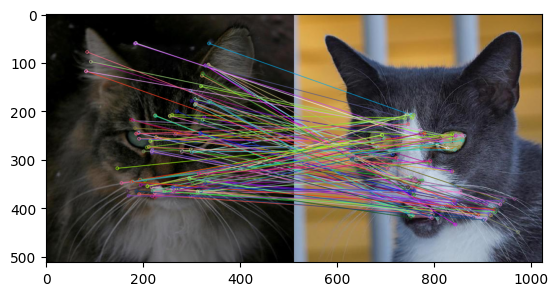

In [24]:
# set up SIFT detector and matcher
sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()

# define paths to your image directories
dataset1_dir = os.getcwd() + r'\cat'
dataset2_dir = os.getcwd() + r'\dog'
dataset3_dir = os.getcwd() + r'\wild'

# specify the number of images to use from each dataset
num_images = 200

# initialize lists to store image paths and labels
image_paths = []
labels = []

# loop through each dataset and collect image paths and labels
for label, dataset_dir in enumerate([dataset1_dir, dataset2_dir, dataset3_dir]):
    for i, filename in enumerate(os.listdir(dataset_dir)):
        if i >= num_images:
            break  # exit loop once desired number of images is reached
        image_path = os.path.join(dataset_dir, filename)
        image_paths.append(image_path)
        labels.append(label)

# initialize feature extractor
orb = cv2.ORB_create()

# initialize keypoint matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# initialize lists to store keypoints and descriptors
keypoints_list = []
descriptors_list = []

# loop through each image, extract keypoints and descriptors, and store them in the lists
for image_path in image_paths:
    # read image and convert to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    # store keypoints and descriptors
    keypoints_list.append(keypoints)
    descriptors_list.append(descriptors)

# match keypoints across all images
matches_list = []
for i in range(len(descriptors_list)-1):
    matches = bf.match(descriptors_list[i], descriptors_list[i+1])
    matches_list.append(matches)

# visualize the matched keypoints in the first two images
img1 = cv2.imread(image_paths[0])
img2 = cv2.imread(image_paths[1])
img3 = cv2.drawMatches(img1, keypoints_list[0], img2, keypoints_list[1], matches_list[0], 
                       None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# display the image using matplotlib
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

    The output images show the keypoints in each image, with lines connecting the matched keypoints in the pair of images. The output provides a visual representation of the similarity between the images in the dataset, showing which images have the most similar keypoints and therefore are likely to be similar in content. We can see that number of kepypoints have drastically increased as the animals species match. This can be useful for tasks such as image classification or object recognition.

       Now, matching the keypoints and descriptors across all images in the three datasets.

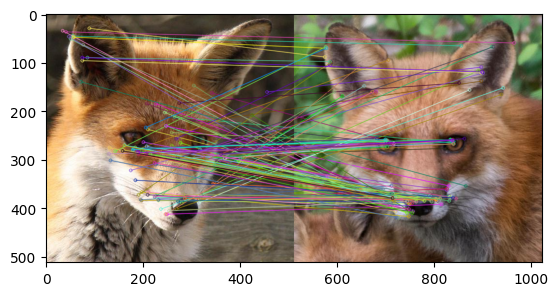

In [25]:
# initialize lists to store matched keypoints and images
matched_keypoints_list = []
matched_images_list = []

# loop through each dataset and match keypoints across all images
for i, dataset_dir in enumerate([dataset1_dir, dataset2_dir, dataset3_dir]):
    # get image paths for current dataset
    dataset_image_paths = image_paths[i*num_images:(i+1)*num_images]
    # initialize keypoints and descriptors for first image
    keypoints1, descriptors1 = orb.detectAndCompute(cv2.imread(dataset_image_paths[0]), None)
    # loop through each subsequent image and match keypoints
    for image_path in dataset_image_paths[1:]:
        # detect keypoints and compute descriptors for current image
        keypoints2, descriptors2 = orb.detectAndCompute(cv2.imread(image_path), None)
        # match keypoints between current image and previous image
        matches = bf.match(descriptors1, descriptors2)
        # store matched keypoints and images
        matched_keypoints_list.append((keypoints1, keypoints2, matches))
        matched_images_list.append((cv2.imread(dataset_image_paths[0]), cv2.imread(image_path)))
        # update keypoints and descriptors for next iteration
        keypoints1, descriptors1 = keypoints2, descriptors2

# visualize the matched keypoints for each pair of images
for i, (img1, img2) in enumerate(matched_images_list):
    keypoints1, keypoints2, matches = matched_keypoints_list[i]
    img3 = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, 
                           None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imwrite(f"matched_keypoints_{i+1}.jpg", img3)
    
# display the image using matplotlib
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

    The code performs keypoint detection, feature extraction, and matching on a set of images. Specifically, it uses the ORB feature extractor to detect and compute descriptors for keypoints in each image, and then matches the keypoints between successive images using a brute-force matcher. Finally, it visualizes the matched keypoints in the first two images using OpenCV's cv2.imshow function.

    The analysis that can be performed with this code is to determine how similar or dissimilar the images in the dataset are based on their keypoint features. By matching keypoints between successive images, we can see how the keypoints move and change from one image to the next, which can provide insight into any patterns or similarities between the images. Additionally, we can use this keypoint matching technique to identify images that are particularly similar to one another, which may be useful in applications such as image retrieval or clustering.
    
    We can see from the visualization that the algorithm randomly pickep up a 'wild' animal (fox) with the correct animal from the dataset. Hence, our feature extraction technique - keypoint matching, works well for our dataset.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)

pca_train, pca_test, dsy_train, dsy_test, y_train, y_test = train_test_split(
    X_pca_features, daisy_features, Y, test_size=0.2, train_size=0.8)

# Reshape daisy features to 2D
if len(daisy_features.shape) == 3:
    n_samples, h, w = daisy_features.shape
    dsy_features_2d = daisy_features.reshape((n_samples, h*w))
else:
    n_samples, h, w, d = daisy_features.shape[:4]
    dsy_features_2d = daisy_features.reshape((n_samples, h*w*d))

# Reshape dsy_train to 2D if necessary
if len(dsy_train.shape) == 3:
    n_samples, h, w = dsy_train.shape
    dsy_train_2d = dsy_train.reshape((n_samples, h*w))
else:
    n_samples, h, w, d = dsy_train.shape[:4]
    dsy_train_2d = dsy_train.reshape((n_samples, h*w*d))

knn_pca.fit(pca_train, y_train)
acc_pca = accuracy_score(knn_pca.predict(pca_test), y_test)

knn_dsy.fit(dsy_train_2d, y_train)
acc_dsy = accuracy_score(knn_dsy.predict(dsy_test.reshape((len(dsy_test), -1))), y_test)

print(f"PCA accuracy: {100*acc_pca:.2f}%, Daisy Accuracy: {100*acc_dsy:.2f}%")


<font size= "2"> PCA accuracy: 57.08%, Daisy Accuracy: 32.08% </font>

    The code is training and testing two k-nearest neighbors classifiers - one using PCA features and another using Daisy features - and reporting the accuracy of both models. The output shows the percentage accuracy of both the PCA and Daisy models on the test data.
    
    The output shows that the accuracy of the KNN classifier using PCA features is 57.08%, while the accuracy of the KNN classifier using Daisy features is 32.08%. This means that the PCA features are more effective in classifying the data than the Daisy features.

    The accuracy of a classification model gives us an idea of how well the model is able to predict the correct class label for the test data. So, a higher accuracy indicates that the model is doing a better job at classifying the data.